##WALMART DATA ANALYSIS


In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
train_df= pd.read_csv('train_walmart.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')

In [62]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [63]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [64]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [65]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [66]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [67]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [68]:
features.shape

(8190, 12)

In [69]:
features.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1,inplace=True)

In [70]:
features.fillna(method='ffill',axis=0,inplace=True)

In [71]:
features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [72]:
##inner join
df = train_df.merge(stores,how='inner',on=['Store'])

In [73]:
train_df.shape

(421570, 5)

In [74]:
df.shape

(421570, 7)

In [75]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size'], dtype='object')

In [76]:
features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [77]:
df = df. merge(features,how ='inner', on= ['Store','Date','IsHoliday'])

In [78]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,192.308899,8.667


In [79]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,192.308899,8.667


In [80]:
df['Date'] = pd.to_datetime(df['Date'])

In [81]:
df['week'] = df.Date.dt.isocalendar().week

In [82]:
df['year']= df.Date.dt.isocalendar().year

In [83]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,192.308899,8.667,43,2012
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,192.308899,8.667,43,2012
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,192.308899,8.667,43,2012
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,192.308899,8.667,43,2012


In [84]:
##write the function that can take feature name as input and create a scatter plot of the that given feature and weakly sales

In [85]:


def scatter_plot(feature):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['Weekly_Sales'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Weekly Sales')
    plt.grid(True)
    plt.show()


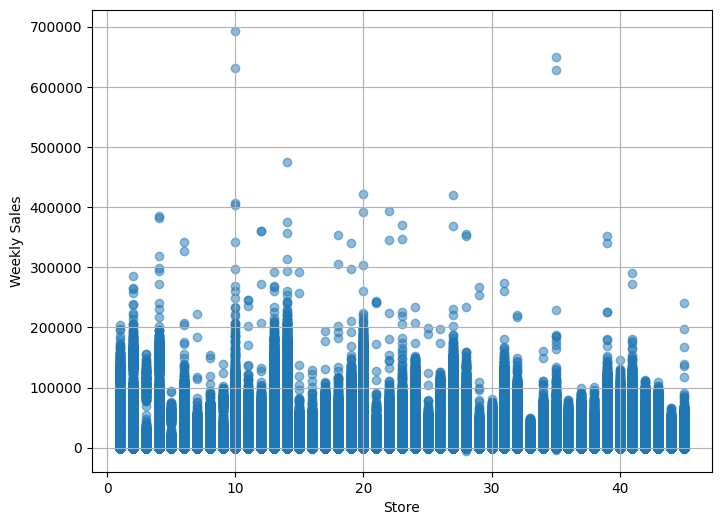

In [86]:
scatter_plot('Store')


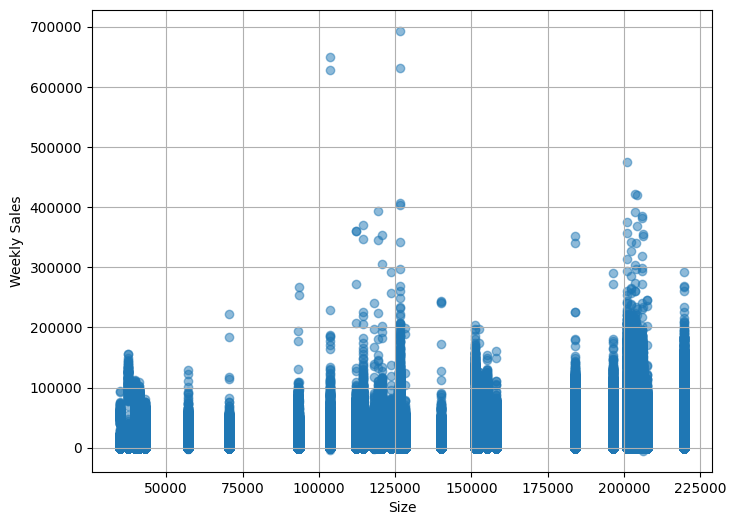

In [87]:
scatter_plot('Size')

In [88]:
##line charts for weekly sales each year
## avg weekly sales for the year 2012


In [89]:
df[df['year']==2012].groupby(['week'])['Weekly_Sales'].mean().values

array([15121.23173562, 14168.26651382, 14221.35740453, 13494.23261179,
       15480.55360766, 16664.2478907 , 16693.40105088, 15458.12447484,
       15672.58694649, 15965.18295562, 15823.71961538, 15195.47262749,
       15289.7203715 , 17935.74115655, 15663.17145113, 15150.43017815,
       14799.18716655, 15947.27510321, 15784.01580558, 15856.39662039,
       16284.41459028, 16405.58943935, 16774.04452027, 16377.57466171,
       16098.71157379, 15887.18449369, 17309.36233705, 15616.44041328,
       15602.82637195, 15034.82951585, 16004.68471857, 16030.92696652,
       16025.19527919, 16029.50121622, 15921.55281229, 16294.69295684,
       14905.97864847, 14989.70838459, 14765.32727887, 15983.41374664,
       15427.59673913, 15295.73239661, 15391.72568097])

<Axes: xlabel='week'>

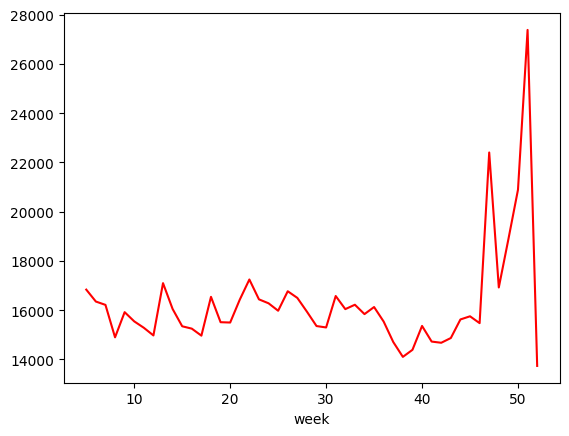

In [90]:
##line charts for weekly sales each year
## avg weekly sales for the year 2012
df['week'] = df['week'].astype(float)
x = df[df['year'] == 2010].groupby(['week'])['Weekly_Sales'].mean()
sns.lineplot(x=x.index, y=x.values, color='red')

<Axes: xlabel='week'>

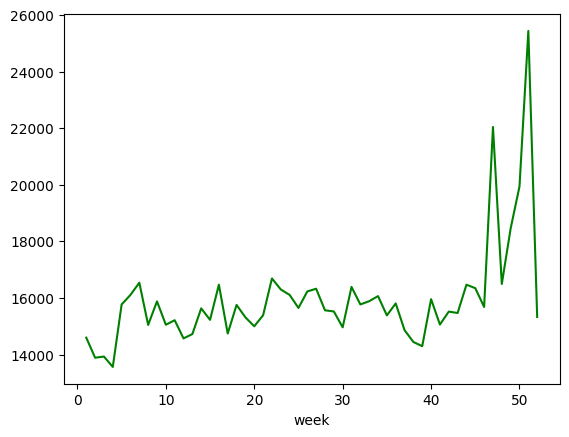

In [91]:
y = df[df['year'] == 2011].groupby(['week'])['Weekly_Sales'].mean()
sns.lineplot(x=y.index, y=y.values, color='green')

<Axes: xlabel='week'>

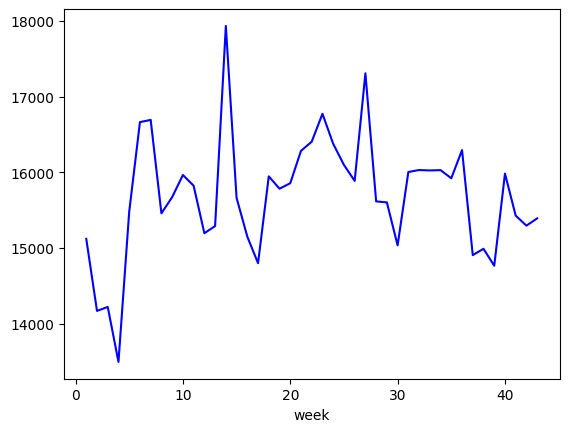

In [92]:
z = df[df['year'] == 2012].groupby(['week'])['Weekly_Sales'].mean()
sns.lineplot(x=z.index, y=z.values, color='blue')

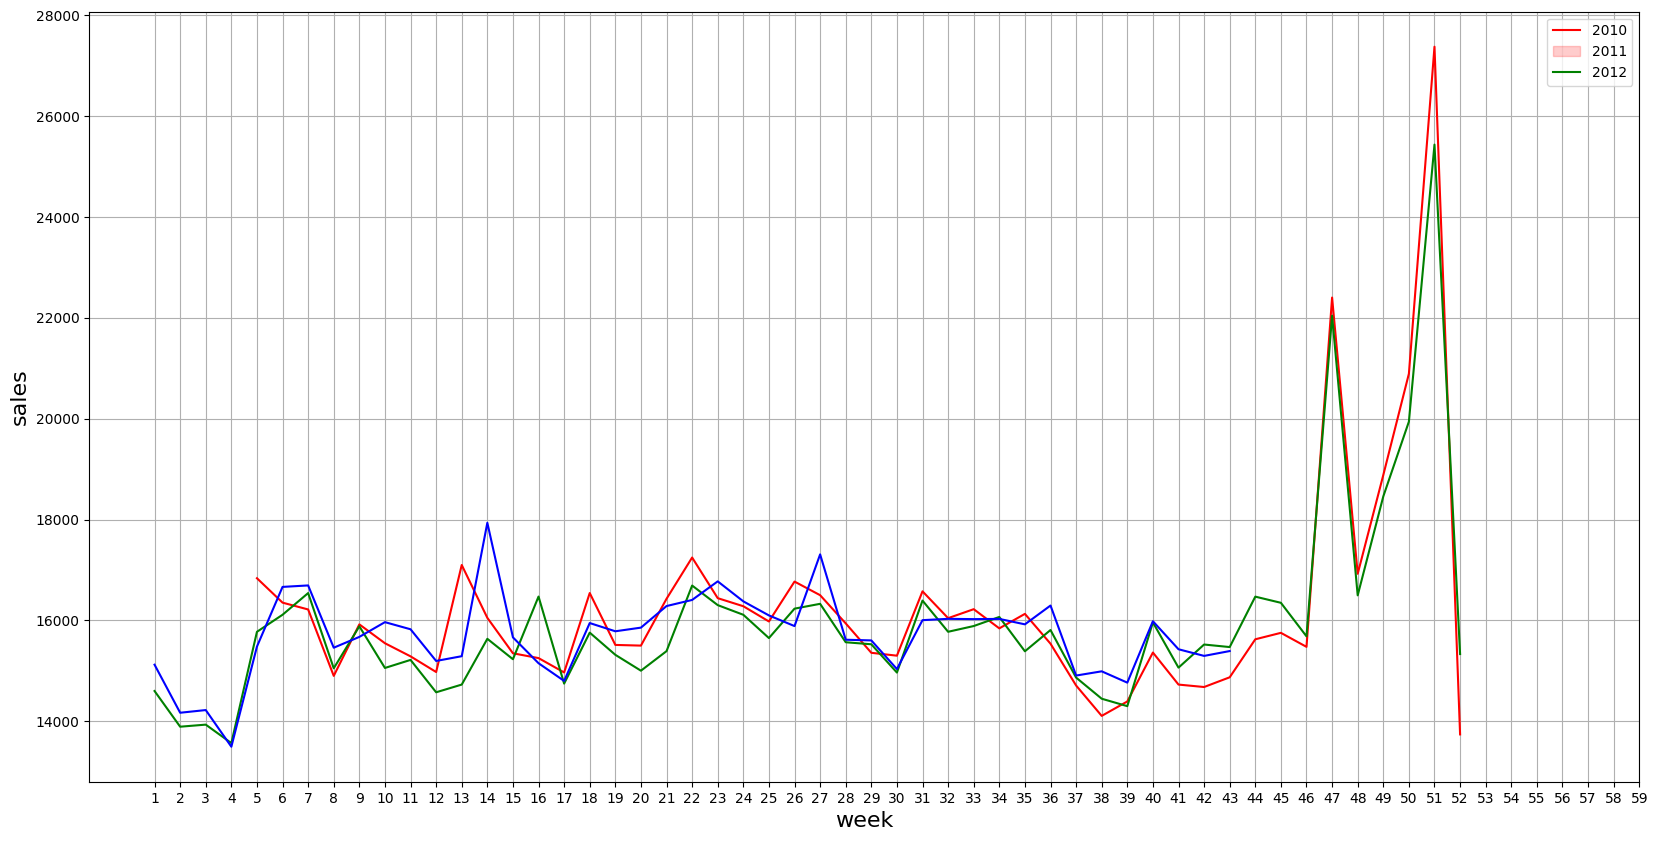

In [93]:
plt.figure(figsize=(20,10))
sns.lineplot(x=x.index, y=x.values, color='red')
sns.lineplot(x=y.index, y=y.values, color='green')
sns.lineplot(x=z.index, y=z.values, color='blue')
plt.grid()
plt.xticks(np.arange(1,60, step=1))
plt.legend(['2010', '2011', '2012'])
plt.xlabel('week', fontsize=16)
plt.ylabel('sales', fontsize=16)
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20268\2765403504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Weekly_Sales'],color='red')


<Axes: ylabel='Density'>

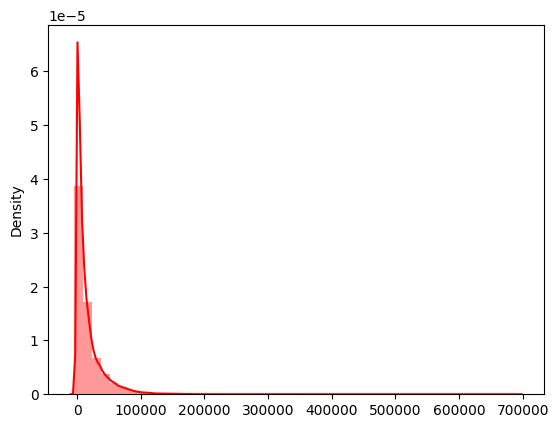

In [94]:
sns.distplot(x=df['Weekly_Sales'],color='red')

In [95]:

weekly_stores = df.groupby('Store')['Weekly_Sales'].mean().reset_index()

In [96]:
weekly_stores= weekly_stores.set_index('Store')

In [97]:
weekly_stores

,Weekly_Sales
Store,
1,21710.543621
2,26898.070031
3,6373.033983
4,29161.210415
5,5053.415813
6,21913.243624
7,8358.766148
8,13133.014768
9,8772.890379


In [98]:
weekly_stores.sort_values('Weekly_Sales').style.bar(align='left')

,Weekly_Sales
Store,
5,5053.415813
33,5728.414053
44,6038.929814
3,6373.033983
38,7492.478460
16,7863.224124
29,8158.810609
7,8358.766148
36,8584.412563


In [99]:
weekly_stores.values.reshape(-1,)

array([21710.54362066, 26898.07003126,  6373.03398296, 29161.21041472,
        5053.41581287, 21913.24362354,  8358.76614833, 13133.01476806,
        8772.89037893, 26332.30381871, 19276.76275094, 14867.30861927,
       27355.13689135, 28784.85172709,  9002.49307343,  7863.22412369,
       12954.39363646, 15733.31313622, 20362.12673433, 29508.30159193,
       11283.43549572, 15181.21888625, 19776.1808806 , 18969.1064998 ,
       10308.15781008, 14554.12967221, 24826.98453594, 18714.88980322,
        8158.8106092 ,  8764.2377194 , 19681.90746401, 16351.62185454,
        5728.41405272, 13522.08167058, 13803.59698573,  8584.41256348,
       10297.35502637,  7492.47845966, 21000.76356246, 13763.63280323,
       17976.0046481 , 11443.37011793, 13415.11411791,  6038.92981448,
       11662.89731452])

Text(0.5, 1.0, 'weekly sales per store')

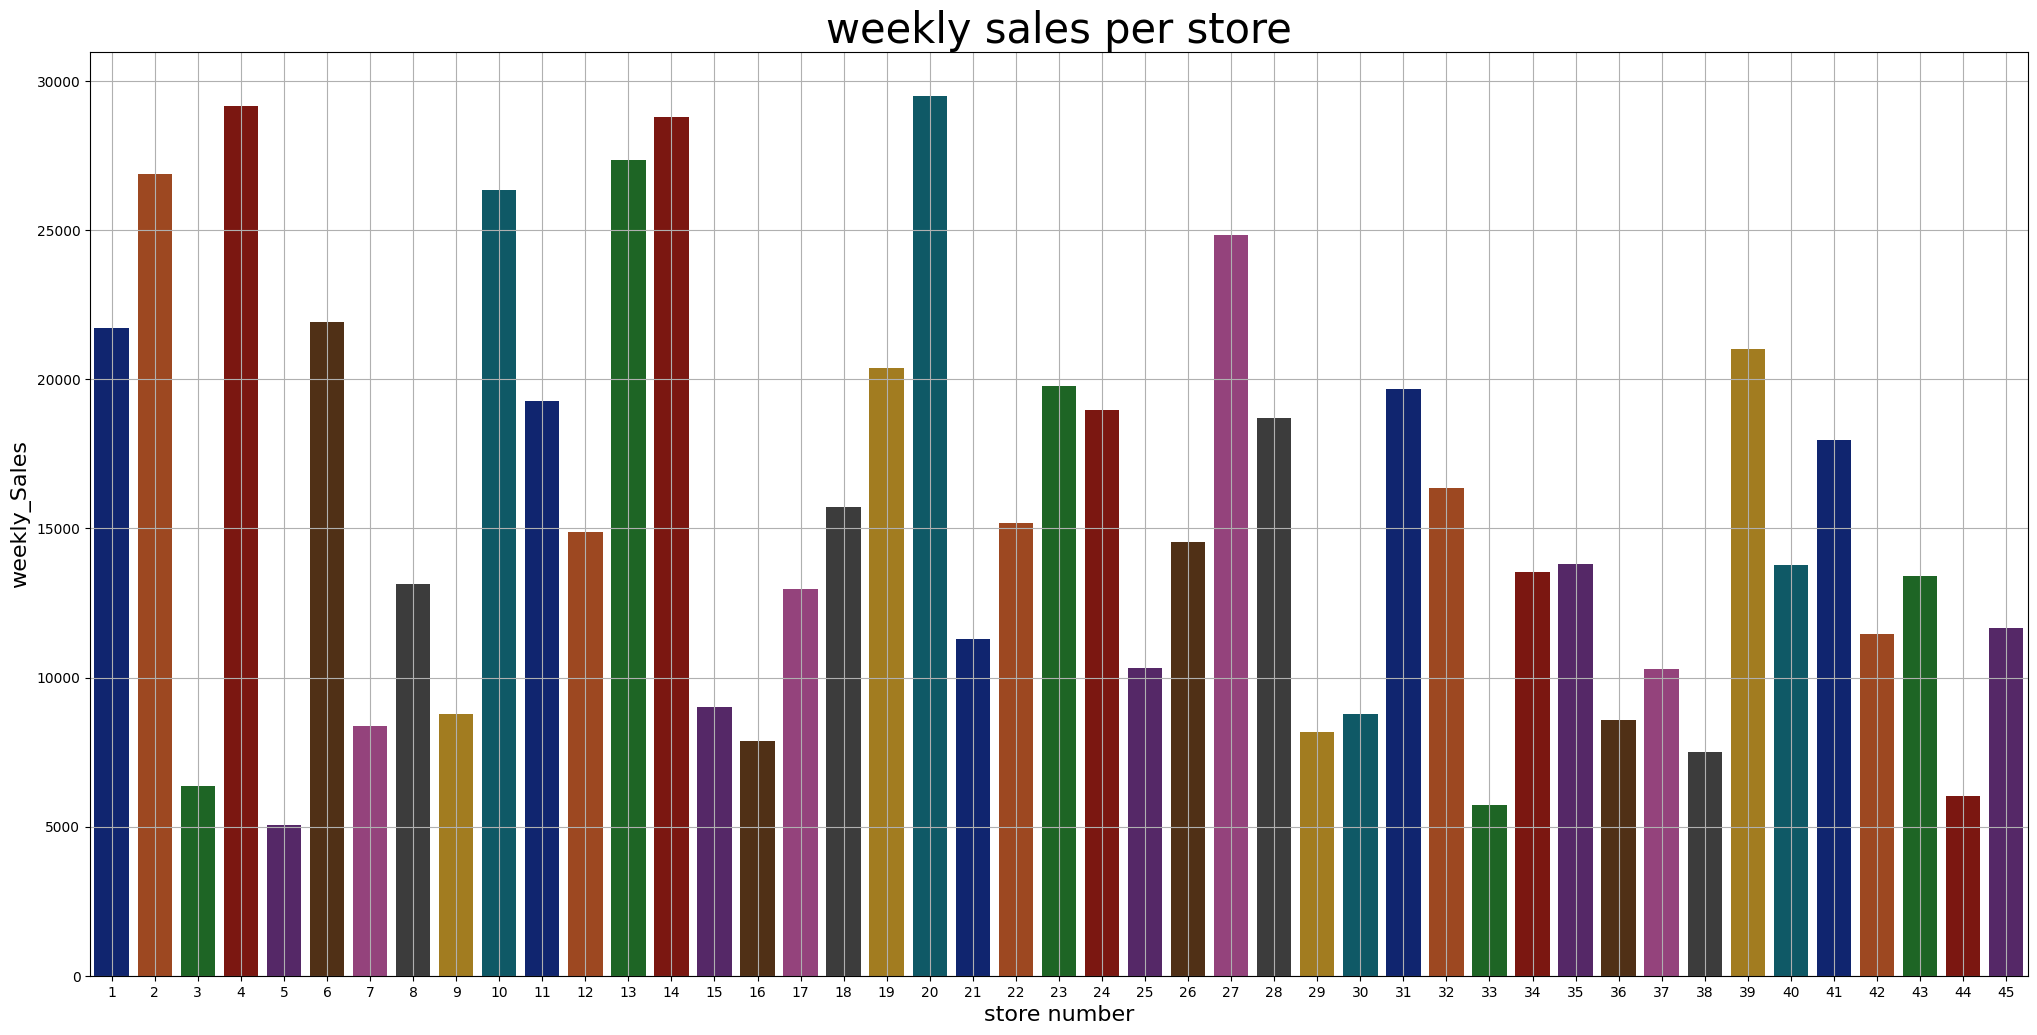

In [100]:

plt.figure(figsize=(25,12))
sns.barplot(x=weekly_stores.index,y=weekly_stores.values.reshape(-1,),palette='dark')
plt.grid()
plt.xlabel('store number',fontsize=16)
plt.ylabel('weekly_Sales',fontsize=16)
plt.title('weekly sales per store',fontsize=30)

In [101]:
week_dept= df['Weekly_Sales'].groupby(df['Dept']).mean()

In [102]:
week_dept = pd.DataFrame(week_dept)


In [103]:
week_dept

,Weekly_Sales
Dept,
1,19213.485088
2,43607.020113
3,11793.698516
4,25974.630238
5,21365.583515
...,...
95,69824.423080
96,15210.942761
97,14255.576919


In [104]:
week_dept.sort_values('Weekly_Sales',ascending=False).style.bar(align='left')

,Weekly_Sales
Dept,
92,75204.870531
95,69824.423080
38,61090.619568
72,50566.515417
65,45441.706224
90,45232.084488
40,44900.702727
2,43607.020113
91,33687.910758


In [105]:
week_dept.values.reshape(-1,)

array([ 1.92134851e+04,  4.36070201e+04,  1.17936985e+04,  2.59746302e+04,
        2.13655835e+04,  4.74785619e+03,  2.41612374e+04,  3.01912635e+04,
        2.02066819e+04,  1.83212724e+04,  1.45056382e+04,  4.17539702e+03,
        3.06638026e+04,  1.48709660e+04,  1.42456383e+04,  1.01871205e+04,
        7.33694354e+03,  1.65481503e+03,  5.52878732e+03,  4.98285083e+03,
        1.07745097e+04,  2.39314740e+04,  6.35360456e+03,  8.98823082e+03,
        7.64941795e+03,  1.58343773e+03,  6.18085116e+02,  5.65365532e+03,
        4.11819721e+03,  2.33944029e+03,  6.83327079e+03,  6.47197958e+03,
        1.56259154e+04,  2.92104495e+03,  2.02257106e+03,  3.11107619e+03,
        6.10906196e+04,  1.11237500e+01,  4.49007027e+04,  1.96556000e+03,
        5.18970342e+03,  1.19333333e+00,  4.65172966e+03,  2.32115857e+01,
        1.99447415e+04, -7.68255418e+00,  1.34489358e+03,  8.15995130e+03,
        2.65889701e+03,  2.19317288e+01,  1.92835625e+03,  1.08305985e+02,
        1.07166646e+04,  

Text(0.5, 1.0, 'weekly sales per store')

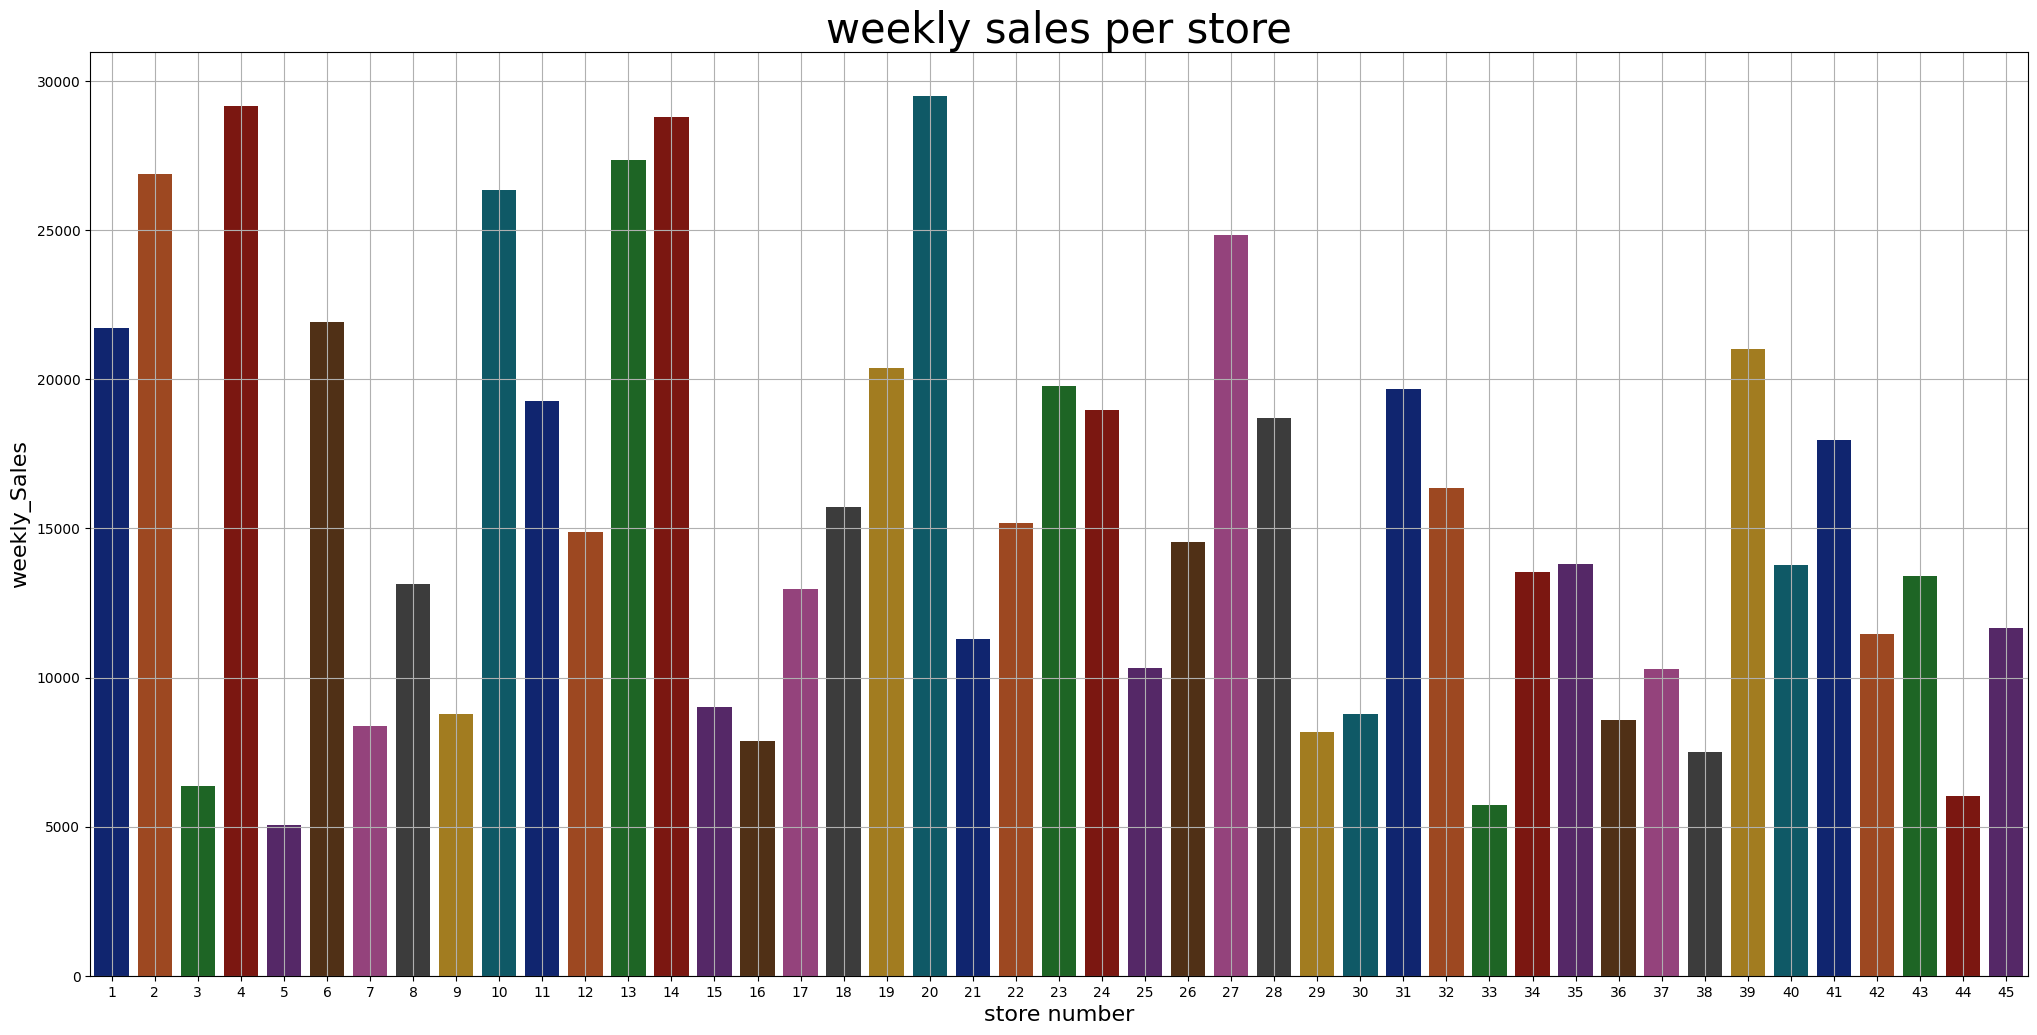

In [106]:
#### 
plt.figure(figsize=(25,12))
sns.barplot(x=weekly_stores.index,y=weekly_stores.values.reshape(-1,),palette='dark')
plt.grid()
plt.xlabel('store number',fontsize=16)
plt.ylabel('weekly_Sales',fontsize=16)
plt.title('weekly sales per store',fontsize=30)

In [107]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')


In [108]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,5.0,2010
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106,5.0,2010
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106,5.0,2010
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106,5.0,2010
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106,5.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,192.308899,8.667,43.0,2012
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,192.308899,8.667,43.0,2012
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,192.308899,8.667,43.0,2012
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,192.308899,8.667,43.0,2012


In [109]:
df


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,5.0,2010
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106,5.0,2010
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106,5.0,2010
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106,5.0,2010
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106,5.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,192.308899,8.667,43.0,2012
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,192.308899,8.667,43.0,2012
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,192.308899,8.667,43.0,2012
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,192.308899,8.667,43.0,2012


In [110]:
numerical_columns = df.select_dtypes(include='number')
corr_matrix = numerical_columns.corr()

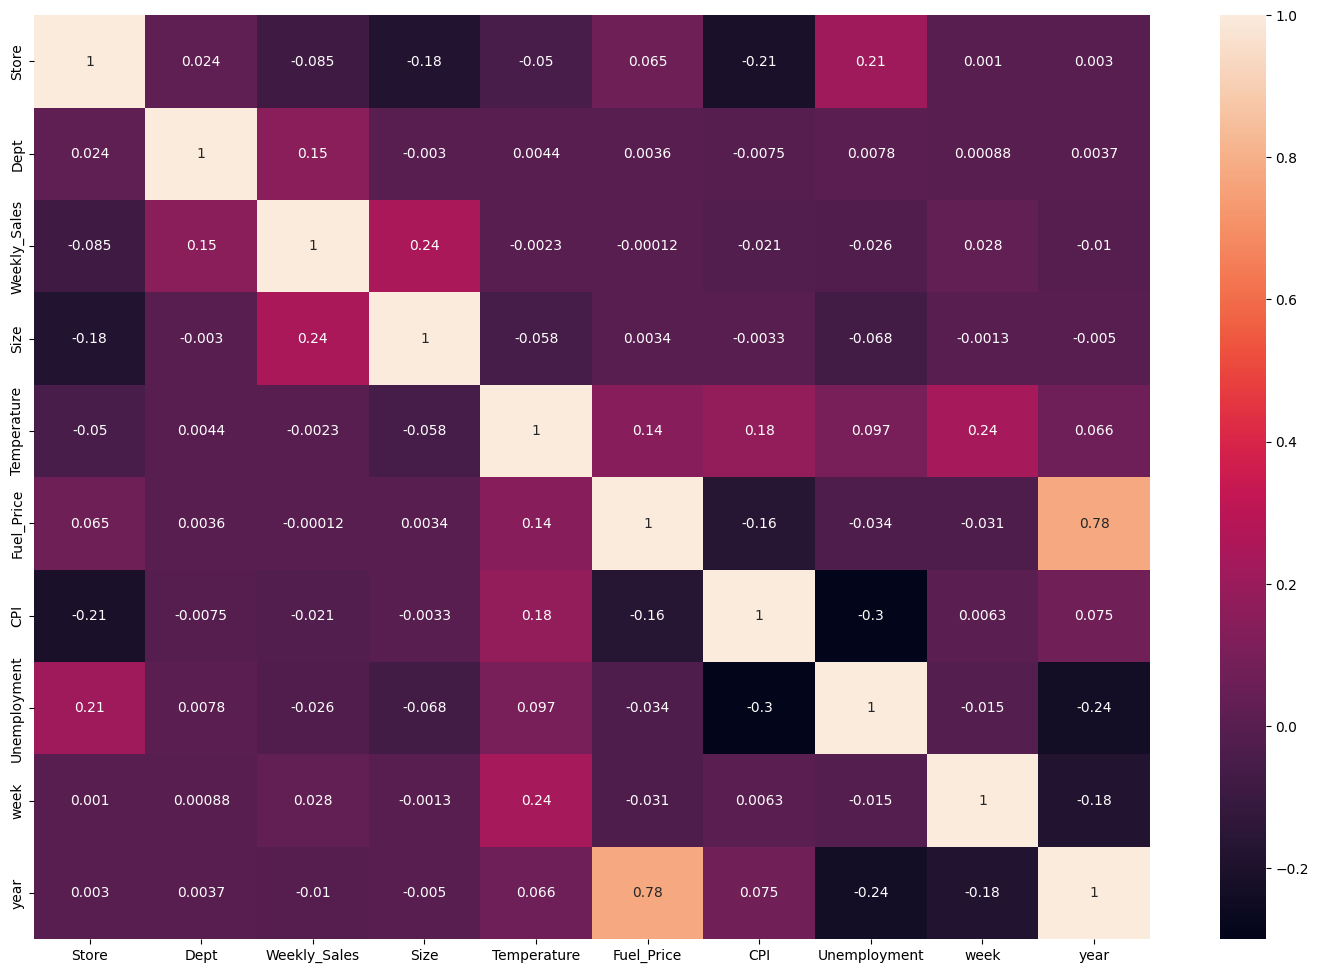

In [111]:
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [112]:
df.columns


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'week', 'year'],
      dtype='object')

In [113]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,5.0,2010
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106,5.0,2010
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106,5.0,2010
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106,5.0,2010
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106,5.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,192.308899,8.667,43.0,2012
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,192.308899,8.667,43.0,2012
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,192.308899,8.667,43.0,2012
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,192.308899,8.667,43.0,2012


<Axes: xlabel='Type'>

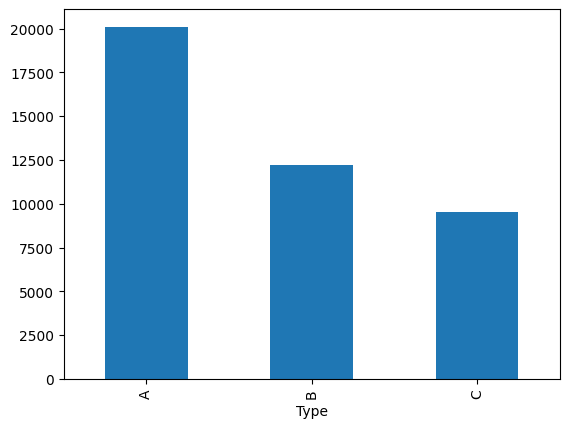

In [114]:
df.groupby(['Type'])['Weekly_Sales'].mean().plot(kind='bar')

<Axes: xlabel='Type', ylabel='Size'>

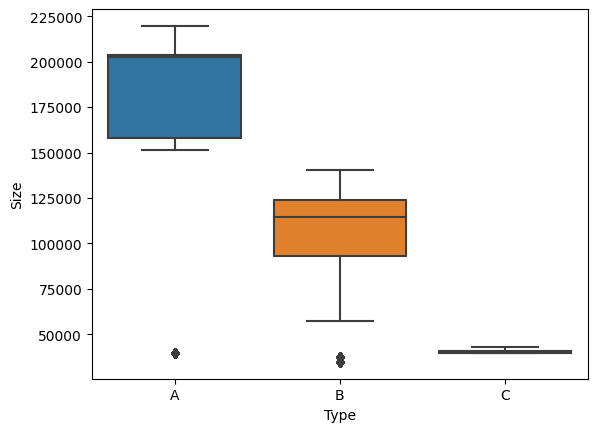

In [115]:

sns.boxplot(x='Type',y='Size',data=df)

<Axes: xlabel='year'>

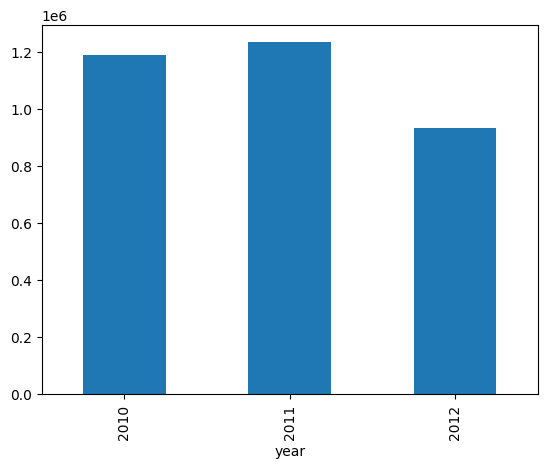

In [116]:
df.groupby(['year'])['Unemployment'].sum().plot(kind='bar')

<Axes: xlabel='year'>

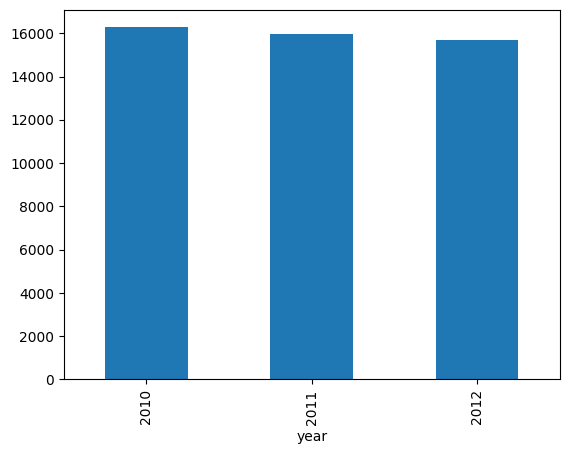

In [117]:
df.groupby(['year'])['Weekly_Sales'].mean().plot(kind='bar')

<Axes: xlabel='year'>

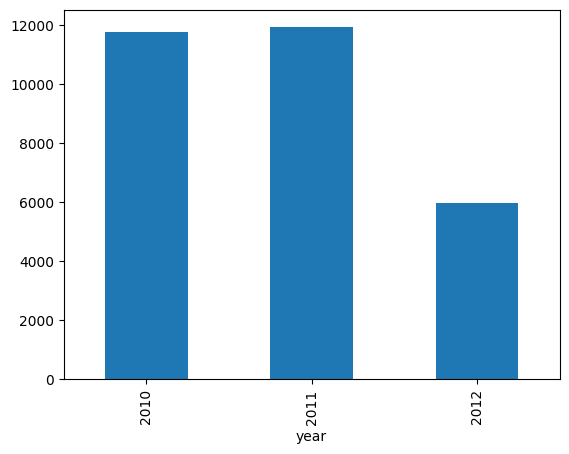

In [118]:
df.groupby(['year'])['IsHoliday'].sum().plot(kind='bar')

In [119]:
df.groupby(['Dept'])['Unemployment'].sum()

Dept
1     51474.537
2     51474.537
3     51474.537
4     51474.537
5     50636.728
        ...    
95    51474.537
96    38100.479
97    50497.493
98    47338.673
99     6403.674
Name: Unemployment, Length: 81, dtype: float64

<Axes: xlabel='Dept'>

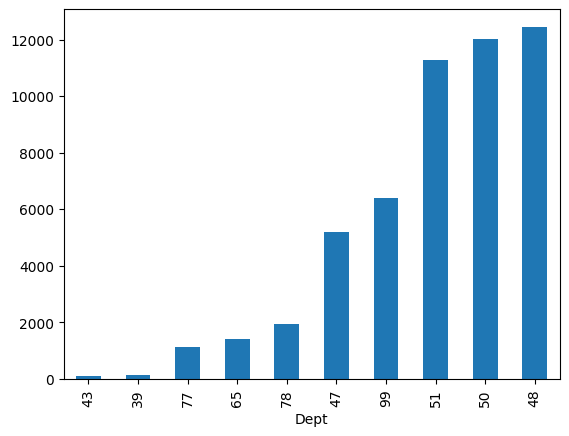

In [120]:
df.groupby(['Dept'])['Unemployment'].sum().sort_values().head(10).plot(kind='bar')

<Axes: xlabel='Dept'>

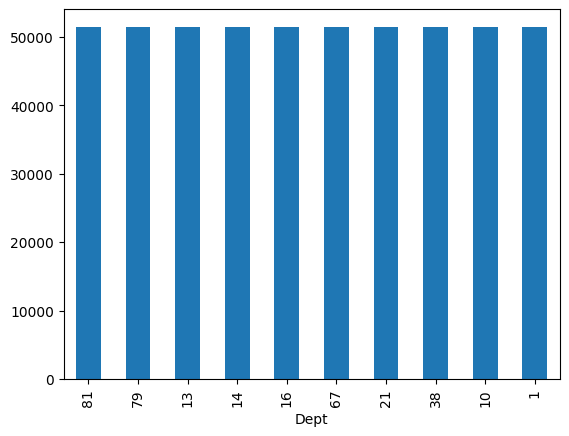

In [121]:
df.groupby(['Dept'])['Unemployment'].sum().sort_values().tail(10).plot(kind='bar')

Insights
1. depratment 1 is having highest unemployment
2. department 43 is having lowest unemployment
3. type c stores are smaller in size, type a stores are larger in size
4. type a stores have higher avg sales, type c stores have lowest
5. store 20 have highest sales
6. store 5 have lowest sales.
7. every year the sales pattern is pretty same and in end of yesr highest sale is expected.
8. departmnet 92 is having highgest avg sales
9. department 47 is lowest avg sales.
10. high correlation between year and fuel price.